<a href="https://colab.research.google.com/github/JohatTech/MINST-Convolutional-Neural-Network/blob/main/MNIST_convolutional_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MINST Convolutional Neural Network**

In this project I going to  build a convolutional neural network to predict hand-written digits numbers base on the MINST dataset stored in the Keras database.

In this first section I start importing the necessary libraires and tools for the projects, for example the layers dependencies of keras and others utilitys.

In [ ]:
#importing libraries
import numpy as np
import tensorflow as tf
import keras
import pandas as pd 
import matplotlib.pyplot as plt 
#convolutional neural network libraries
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from keras.layers.convolutional import MaxPooling2D
from keras.utils.np_utils import to_categorical

In [ ]:
##check if i have gpu 
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In this section now I'm going to extract the mnist dataset from the keras database and split the data in trainning and the testing sides.

After that, I convert the format of the pixels into float32 format which is commonly used in keras arquitectures.

In [ ]:
#extracting the mnist dataset from keras database
(X_train,y_train), (X_test, y_test)= keras.datasets.mnist.load_data()
X_train=X_train.reshape(X_train.shape[0], 1,28,28).astype('float32')
X_test=X_test.reshape(X_test.shape[0], 1,28,28).astype('float32')

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 1, 28, 28)

Then I scale the shape of the image so they can balanced and don't cause any outliers and problem during the trainning section, in this case, as the color code goes from 0-255 I scale dividing all the data by 255, then I one-hot encode the label of the images using the utility to_categorical.


In [ ]:
X_train=X_train/255
X_test=X_test/255
y_train= to_categorical(y_train)
y_test= to_categorical(y_test)
num_classes=y_train.shape[1]
print(num_classes)

10


In [ ]:
#function to plot the performance 

def performance_plot(history):
  #convert history object to dataframe
  
  fig = plt.figure(figsize = (10,5))
  fig.add_subplot(1,2,1)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.xlabel('epochs')
  plt.ylabel('Accuracy') 
  #Loss vs epochs
  fig.add_subplot(1,2,2)
  plt.xlabel('epochs')
  plt.ylabel('Loss')
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.show()

In [ ]:
from keras.layers.pooling import AveragePooling2D
optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001)
def cnn_model():
  Model = Sequential()
  Model.add(Conv2D(32,(5,5), padding = 'same', input_shape = (1,28,28),activation = 'relu' ,data_format='channels_first'))

  Model.add(AveragePooling2D( pool_size = (2,2), padding = 'same', strides=(2, 2)))
  Model.add(Conv2D(64,(5,5), activation = 'relu' ))
  Model.add(Dropout(0.2))

  Model.add(Conv2D(128,(5,5), activation = 'relu' ))
  Model.add(AveragePooling2D( pool_size = (2,2), padding = 'same', strides=(2, 2)))
  Model.add(Dropout(0.2))

  Model.add(Flatten())
  Model.add(Dense(256, activation = 'relu'))
  Model.add(Dense(num_classes, activation = 'softmax'))
  Model.compile(optimizer = optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  return Model


Epoch 1/100
120/120 - 3s - loss: 0.4252 - accuracy: 0.8657 - val_loss: 0.0732 - val_accuracy: 0.9766 - 3s/epoch - 26ms/step
Epoch 2/100
120/120 - 3s - loss: 0.0784 - accuracy: 0.9760 - val_loss: 0.0527 - val_accuracy: 0.9831 - 3s/epoch - 21ms/step
Epoch 3/100
120/120 - 3s - loss: 0.0545 - accuracy: 0.9828 - val_loss: 0.0410 - val_accuracy: 0.9859 - 3s/epoch - 21ms/step
Epoch 4/100
120/120 - 3s - loss: 0.0443 - accuracy: 0.9865 - val_loss: 0.0335 - val_accuracy: 0.9885 - 3s/epoch - 21ms/step
Epoch 5/100
120/120 - 3s - loss: 0.0380 - accuracy: 0.9878 - val_loss: 0.0305 - val_accuracy: 0.9897 - 3s/epoch - 21ms/step
Epoch 6/100
120/120 - 3s - loss: 0.0336 - accuracy: 0.9895 - val_loss: 0.0267 - val_accuracy: 0.9906 - 3s/epoch - 21ms/step
Epoch 7/100
120/120 - 3s - loss: 0.0283 - accuracy: 0.9910 - val_loss: 0.0269 - val_accuracy: 0.9906 - 3s/epoch - 22ms/step
Epoch 8/100
120/120 - 3s - loss: 0.0267 - accuracy: 0.9913 - val_loss: 0.0248 - val_accuracy: 0.9922 - 3s/epoch - 22ms/step
Epoch 9/

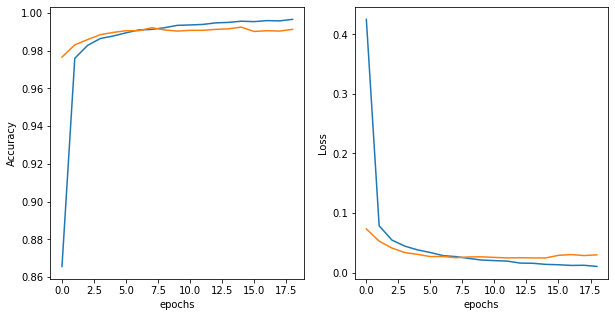

In [ ]:
from keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
#Early stopping to avoid overfitting of model
model_cnn = cnn_model()
history = model_cnn.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=100, callbacks=[early_stop], batch_size=500, verbose=2)
performance_plot(history)